<a href="https://colab.research.google.com/github/premkumar6/Deep_learning/blob/main/CNN_%20digit%20recogniser%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm, skew 
import matplotlib.pyplot as plt 
from warnings import filterwarnings as filt 
import tensorflow as tf
import tensorflow.keras as keras 
import seaborn as sns

filt('ignore')
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 6)


In [7]:
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

In [8]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
train_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,14339.000000,14339.0,14339.0,14339.0,14339.0,14339.0,14339.0,14339.0,14339.0,14339.0,14339.0,14338.0,14338.0,14338.0,14338.0,14338.0,14338.0,14338.0,14338.0,14338.0,14338.0,14338.0,14338.0,14338.0,14338.0,14338.0,14338.0,14338.0,14338.0,14338.0,14338.0,14338.0,14338.0,14338.0,14338.0,14338.000000,14338.000000,14338.000000,14338.000000,14338.000000,...,14338.000000,14338.000000,14338.000000,14338.000000,14338.000000,14338.000000,14338.000000,14338.000000,14338.000000,14338.0,14338.0,14338.0,14338.0,14338.0,14338.0,14338.0,14338.0,14338.000000,14338.000000,14338.000000,14338.000000,14338.000000,14338.000000,14338.000000,14338.000000,14338.000000,14338.000000,14338.000000,14338.000000,14338.000000,14338.000000,14338.000000,14338.000000,14338.000000,14338.000000,14338.0,14338.0,14338.0,14338.0,14338.0
mean,4.450241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006068,0.030130,0.074348,0.079509,0.141791,...,3.952225,2.924815,1.850537,1.103501,0.575115,0.220603,0.111382,0.042893,0.000349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017994,0.064723,0.096038,0.140815,0.176245,0.308899,0.505510,0.592203,0.550146,0.710001,0.592063,0.431859,0.252406,0.145488,0.088785,0.043172,0.017645,0.001534,0.0,0.0,0.0,0.0,0.0
std,2.882059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.710058,2.278003,3.907299,3.235878,5.458274,...,27.657377,23.692481,18.799313,14.358502,10.600422,6.293341,4.465027,2.769197,0.041757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.625573,3.362956,4.089983,4.894640,5.472242,7.015616,9.976481,10.948696,9.700281,11.821615,10.614538,8.853389,6.557027,5.190374,3.868974,2.892921,1.608648,0.183729,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0

In [10]:
def normalize(x):
  x = x/255.00
  return x

In [11]:
train_df.shape

(14339, 785)

In [12]:
train_df.shape[0]* 0.1

1433.9

In [13]:
from sklearn.model_selection import train_test_split

In [17]:
x = train_df.drop(["label"], axis=1)
x = normalize(x)
y = train_df.label

1    1610
7    1496
2    1465
3    1443
6    1435
9    1414
4    1401
0    1395
8    1377
5    1303
Name: label, dtype: int64

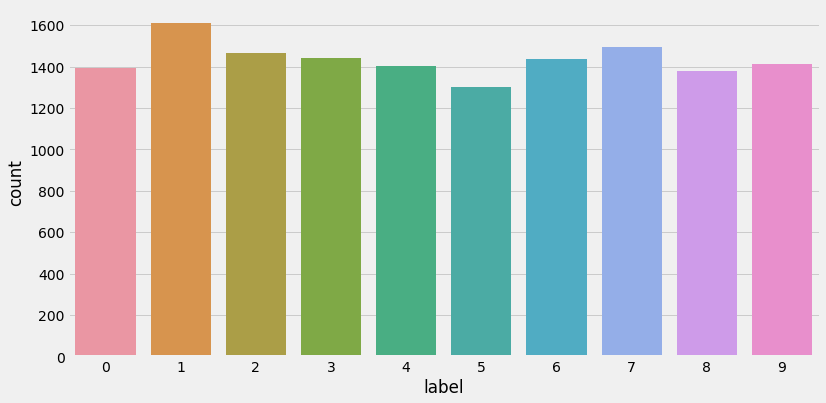

In [19]:
sns.countplot(y)
y.value_counts()

In [20]:
x_train, x_dev, y_train, y_dev = train_test_split(x, y, test_size = 0.2, stratify = y)

In [21]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train)
y_dev = to_categorical(y_dev)

In [22]:
y_train.shape, x_train.shape

((11471, 10), (11471, 784))

In [24]:
model = keras.Sequential([
    keras.layers.Input(shape=(28*28)),
    keras.layers.Dense(units = 250, activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units = 150, activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units = 250, activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units = 150, activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units = 10, activation = 'softmax')
])


In [25]:
model

In [27]:
keras.optimizers.Adam()

In [28]:
model.compile(optimizer="Adam", loss=tf.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [46]:
history = model.fit(x_train,y_train,batch_size=64, epochs=28,validation_split=0.1)

Epoch 1/28
162/162 [==============================] - 2s 11ms/step - loss: nan - accuracy: 0.0967 - val_loss: nan - val_accuracy: 0.1028
Epoch 2/28
162/162 [==============================] - 2s 9ms/step - loss: nan - accuracy: 0.0967 - val_loss: nan - val_accuracy: 0.1028
Epoch 3/28
162/162 [==============================] - 2s 10ms/step - loss: nan - accuracy: 0.0967 - val_loss: nan - val_accuracy: 0.1028
Epoch 4/28
162/162 [==============================] - 2s 9ms/step - loss: nan - accuracy: 0.0967 - val_loss: nan - val_accuracy: 0.1028
Epoch 5/28
162/162 [==============================] - 1s 9ms/step - loss: nan - accuracy: 0.0967 - val_loss: nan - val_accuracy: 0.1028
Epoch 6/28
162/162 [==============================] - 2s 10ms/step - loss: nan - accuracy: 0.0967 - val_loss: nan - val_accuracy: 0.1028
Epoch 7/28
162/162 [==============================] - 2s 9ms/step - loss: nan - accuracy: 0.0967 - val_loss: nan - val_accuracy: 0.1028
Epoch 8/28
162/162 [=========================

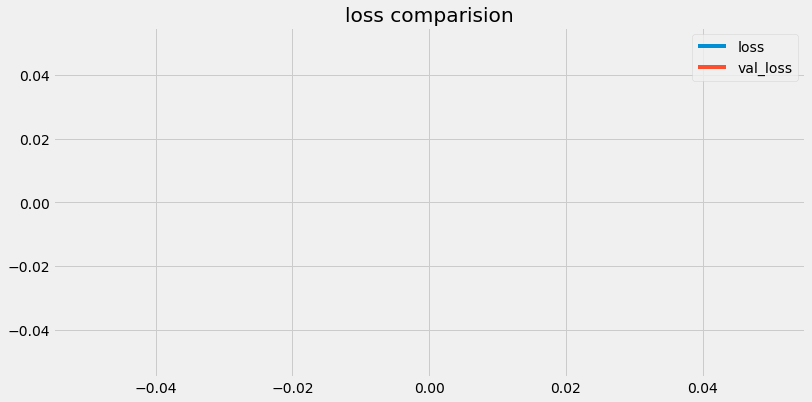

In [47]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title('loss comparision');

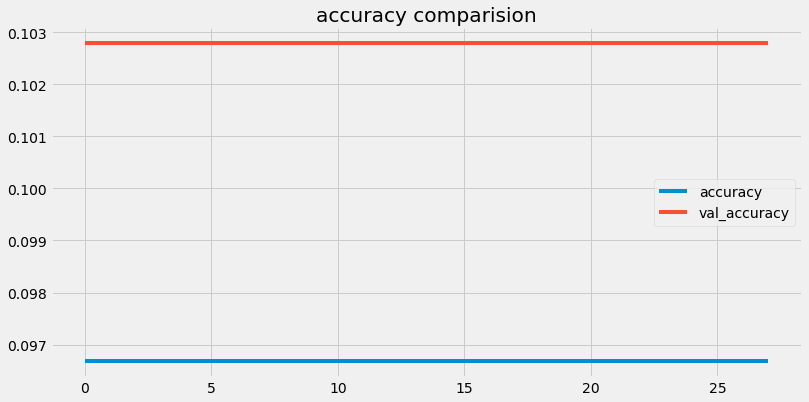

In [48]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title('accuracy comparision');

In [36]:
np.argmax(y_dev[:5], axis = 1)

array([7, 1, 8, 5, 2])

In [37]:
def plot_digits(x, y):
    plt.imshow(x.reshape(28, 28))
    plt.title(f'actual val : {np.argmax(y)}')
    plt.axis('off')

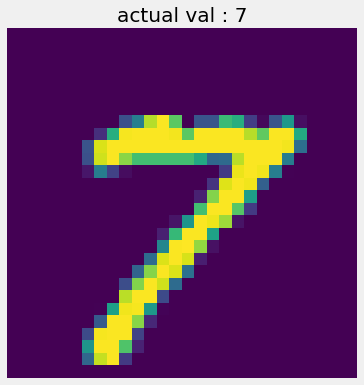

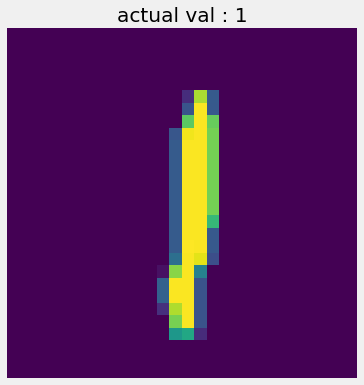

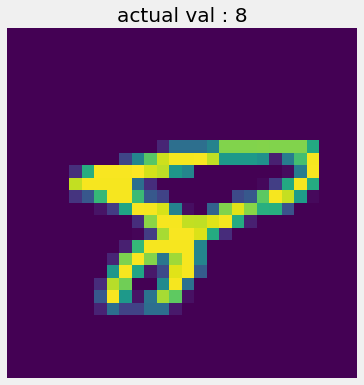

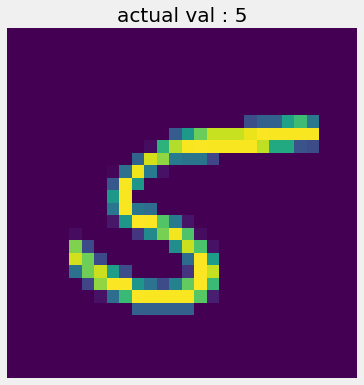

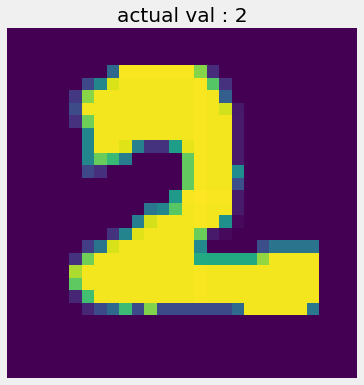

In [38]:
for i in range(5):
    fig = plt.figure(i)
    plot_digits(x_dev.iloc[i].values, y_dev[i])

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
pred = np.argmax(model.predict(x_dev), axis = 1)
y_true = np.argmax(y_dev, axis = 1)

In [52]:
print(classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.10      1.00      0.18       279
           1       0.00      0.00      0.00       322
           2       0.00      0.00      0.00       293
           3       0.00      0.00      0.00       289
           4       0.00      0.00      0.00       280
           5       0.00      0.00      0.00       261
           6       0.00      0.00      0.00       287
           7       0.00      0.00      0.00       299
           8       0.00      0.00      0.00       275
           9       0.00      0.00      0.00       283

    accuracy                           0.10      2868
   macro avg       0.01      0.10      0.02      2868
weighted avg       0.01      0.10      0.02      2868



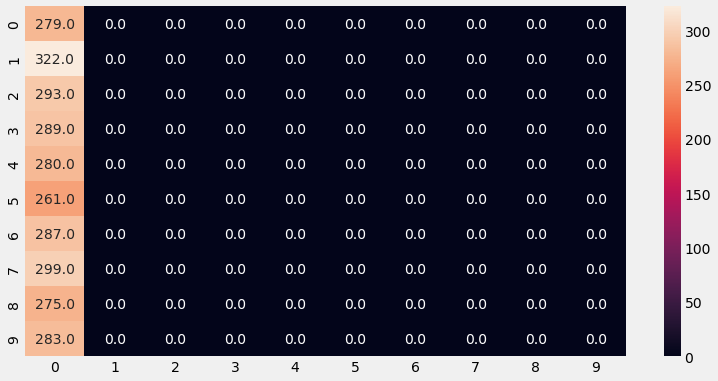

In [53]:
sns.heatmap(confusion_matrix(y_true, pred), annot = True, fmt = '.1f')

In [43]:
from sklearn.manifold import TSNE
import plotly.express as px

In [44]:
def sample(x, y, frac):
    x, xt, y, xt = train_test_split(x, y, test_size = frac, stratify = y)
    return x, y

def tsne_3d_plot(x, y, params = {}, frac = 1):
    if frac < 1:
        x, y = sample(x, y, frac)
    tsne = TSNE(**params)
    xtsne = pd.DataFrame(tsne.fit_transform(x), columns = ['x', 'y', 'z'], index = x.index)
    xtsne['target'] = y
    return px.scatter_3d(data_frame = xtsne, x = 'x', y = 'y', z = 'z', color = 'target')

In [45]:
params = {
    'n_components' : 3,
    'perplexity' : 40,
    'n_iter' : 2500,
    'verbose' : 1
}

tsne_3d_plot(x, y, params, 0.9)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1433 samples in 0.001s...
[t-SNE] Computed neighbors for 1433 samples in 0.151s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1433
[t-SNE] Computed conditional probabilities for sample 1433 / 1433
[t-SNE] Mean sigma: 2.699600
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.070938
[t-SNE] KL divergence after 2250 iterations: 0.935201
